https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-3%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E9%82%8F%E8%BC%AF%E6%96%AF%E5%9B%9E%E6%AD%B8-logistic-regression-%E4%BB%8B%E7%B4%B9-a1a5f47017e5

* 前面Perceptron 能夠讓我們成功達成二元分類，但我們只能知道預測結果是A還是B，沒辦法知道是A、是B的機率是多少。
* 這種應用在我們生活中非常常見，比如說我們要根據今天的溫度、濕度、風向來預測明天的天氣，通常我們會需要知道明天是晴天的機率以及雨天的機率，來決定是否帶傘具出門。如果使用Logistic Regression就可以幫我們達成這樣的目標!

# Logistic Regression

* 看名字以為是回歸的模型，但其實是一個分類的模型
* 這個分類的模型大致跟Perceptron類似，只是Perceptron是根據 w0*x0+w1*x1+…+wn*xn >0 或≤0來判斷成A或B類
* 而Logistic Regression則是一個平滑的曲線，當w0*x0+w1*x1+…+wn*xn越大時判斷成A類的機率越大，越小時判斷成A類的機率越小。
* 由於是二元分類，如果判斷成A類的機率越小，B類的機率越大(判斷成B類的機率 = 1 - 判斷成A的機率)。

![Image of Yaktocat](https://miro.medium.com/max/700/1*3kUjZYHT6_Q7JrMgc17f4w.png)

![Image of Yaktocat](https://miro.medium.com/max/700/1*EipHXlFAXKHKLOcjhBnhYQ.png)

### Sigmoid函數，也稱為logistic function
* 這個函數的y 的值介於 0~1，這樣的分布也符合機率是在0~1的範圍中。
* 當Z=0時判斷成+1類(A類)的機率為0.5，因此只要 z >0 判斷成 A類的機率就會>0.5 ，我們也就把它判斷成+1類(A類)。(這邊跟上一章perceptron一樣，只是多了機率的資訊)
* 如果z≤0 判斷成A類的機率就≤0.5 ，因此我們就把他判斷成-1類(B類)

![Image of Yaktocat](https://miro.medium.com/max/700/1*k6Hhx9PUNXlalqwixJDjbQ.png)

### Logistic Regression優點：
1. 資料不需要線性可分
2. 可以獲得A類跟B類的機率
3. 實務上Logistic Regression執行速度非常快
### Logistic Regression缺點：
1. 線的切法不夠漂亮，以人的觀察應該要大概要像是綠色的線才是一個比較好的分法（下一章的SVM將會解決這個問題）

In [ ]:
接下來要直接套用Sklearn裡面的logistic Regression model

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()  #載入Iris資料集
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


sepal length (cm)  petal length (cm)  target
0                5.1                1.4       0
1                4.9                1.4       0
2                4.7                1.3       0

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [8]:
X_train

sepal length (cm)  petal length (cm)
60                5.0                3.5
80                5.5                3.8
90                5.5                4.4
68                6.2                4.5
51                6.4                4.5
27                5.2                1.5
18                5.7                1.7
56                6.3                4.7
63                6.1                4.7
74                6.4                4.3
1                 4.9                1.4
61                5.9                4.2
42                4.4                1.3
41                4.5                1.3
4                 5.0                1.4
15                5.7                1.5
17                5.1                1.4
40                5.0                1.3
38                4.4                1.3
5                 5.4                1.7
91                6.1                4.6
59                5.2                3.9
0                 5.1                1.4
34                4.9                1.5
28                5.2                1.4
50                7.0                4.7
11                4.8                1.6
35                5.0                1.2
23                5.1                1.7
52                6.9                4.9
..                ...                ...
19                5.1                1.5
29                4.7                1.6
49                5.0                1.4
97                6.2                4.3
98                5.1                3.0
69                5.6                3.9
20                5.4                1.7
94                5.6                4.2
72                6.3                4.9
77                6.7                5.0
25                5.0                1.6
37                4.9                1.5
81                5.5                3.7
46                5.1                1.6
39                5.1                1.5
65                6.7                4.4
58                6.6                4.6
12                4.8                1.4
88                5.6                4.1
70                5.9                4.8
87                6.3                4.4
36                5.5                1.3
21                5.1                1.5
83                6.0                5.1
9                 4.9                1.5
96                5.7                4.2
67                5.8                4.1
64                5.6                3.6
47                4.6                1.4
44                5.1                1.9

[70 rows x 2 columns]

In [9]:
len(X_train)

70

In [10]:
X_test

sepal length (cm)  petal length (cm)
26                5.0                1.6
86                6.7                4.7
2                 4.7                1.3
55                5.7                4.5
75                6.6                4.4
93                5.0                3.3
16                5.4                1.3
73                6.1                4.7
54                6.5                4.6
95                5.7                4.2
53                5.5                4.0
92                5.8                4.0
78                6.0                4.5
13                4.3                1.1
7                 5.0                1.5
30                4.8                1.6
22                4.6                1.0
24                4.8                1.9
33                5.5                1.4
8                 4.4                1.4
43                5.0                1.6
62                6.0                4.0
3                 4.6                1.5
71                6.1                4.0
45                4.8                1.4
48                5.3                1.5
6                 4.6                1.4
99                5.7                4.1
82                5.8                3.9
76                6.8                4.8

In [11]:
len(X_test)

30

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
X_train_std

array([[-0.80800774,  0.43610124],
       [ 0.01648995,  0.64424047],
       [ 0.01648995,  1.06051892],
       [ 1.17078673,  1.12989866],
       [ 1.50058581,  1.12989866],
       [-0.47820866, -0.95149361],
       [ 0.34628903, -0.81273413],
       [ 1.33568627,  1.26865815],
       [ 1.00588719,  1.26865815],
       [ 1.50058581,  0.99113918],
       [-0.97290728, -1.02087335],
       [ 0.67608811,  0.92175944],
       [-1.79740498, -1.0902531 ],
       [-1.63250544, -1.0902531 ],
       [-0.80800774, -1.02087335],
       [ 0.34628903, -0.95149361],
       [-0.6431082 , -1.02087335],
       [-0.80800774, -1.0902531 ],
       [-1.79740498, -1.0902531 ],
       [-0.14840959, -0.81273413],
       [ 1.00588719,  1.19927841],
       [-0.47820866,  0.71362021],
       [-0.6431082 , -1.02087335],
       [-0.97290728, -0.95149361],
       [-0.47820866, -1.02087335],
       [ 2.48998304,  1.26865815],
       [-1.13780682, -0.88211387],
       [-0.80800774, -1.15963284],
       [-0.6431082 ,

In [16]:
from IPython.display import Math

In [27]:
Math(r'z=w^Tx')

<IPython.core.display.Math object>

In [28]:
Math(r'\phi{(z)}=\frac{1}{1+e^{-z}}')

<IPython.core.display.Math object>

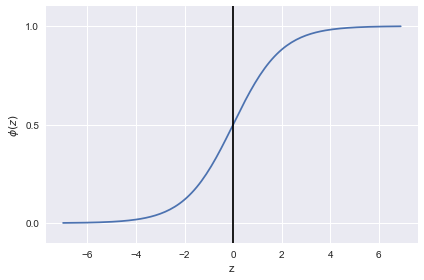

In [17]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

In [ ]:
y_train['target'].values

In [ ]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(X_train_std,y_train['target'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

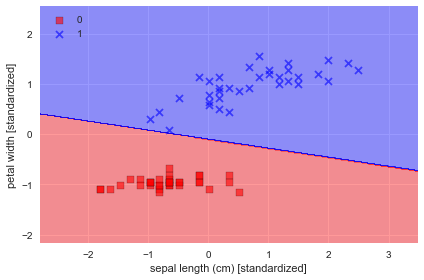

In [29]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=lr)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
lr.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1])

In [24]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1])

In [25]:
error = 0
for i, v in enumerate(lr.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [26]:
lr.predict_proba(X_test_std)

array([[ 0.93978177,  0.06021823],
       [ 0.005938  ,  0.994062  ],
       [ 0.97412756,  0.02587244],
       [ 0.0212674 ,  0.9787326 ],
       [ 0.0119407 ,  0.9880593 ],
       [ 0.32159479,  0.67840521],
       [ 0.95312111,  0.04687889],
       [ 0.0100283 ,  0.9899717 ],
       [ 0.00867294,  0.99132706],
       [ 0.03869904,  0.96130096],
       [ 0.06752495,  0.93247505],
       [ 0.05267873,  0.94732127],
       [ 0.01641248,  0.98358752],
       [ 0.98776985,  0.01223015],
       [ 0.95041495,  0.04958505],
       [ 0.94900694,  0.05099306],
       [ 0.98704203,  0.01295797],
       [ 0.9094647 ,  0.0905353 ],
       [ 0.93811592,  0.06188408],
       [ 0.97556281,  0.02443719],
       [ 0.93978177,  0.06021823],
       [ 0.04455382,  0.95544618],
       [ 0.96461079,  0.03538921],
       [ 0.04095329,  0.95904671],
       [ 0.96560356,  0.03439644],
       [ 0.93638206,  0.06361794],
       [ 0.97099504,  0.02900496],
       [ 0.04711351,  0.95288649],
       [ 0.06393071,